# Статистические методы прогноза временных рядов

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Часть 1

Делаем ряд стационарным

In [15]:
ts_wage = pd.read_csv(
    'https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/monthly_wage.csv',
    sep=';',
    decimal='.',
    parse_dates=True,
    index_col='Month'
    )
ts_wage.head()

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


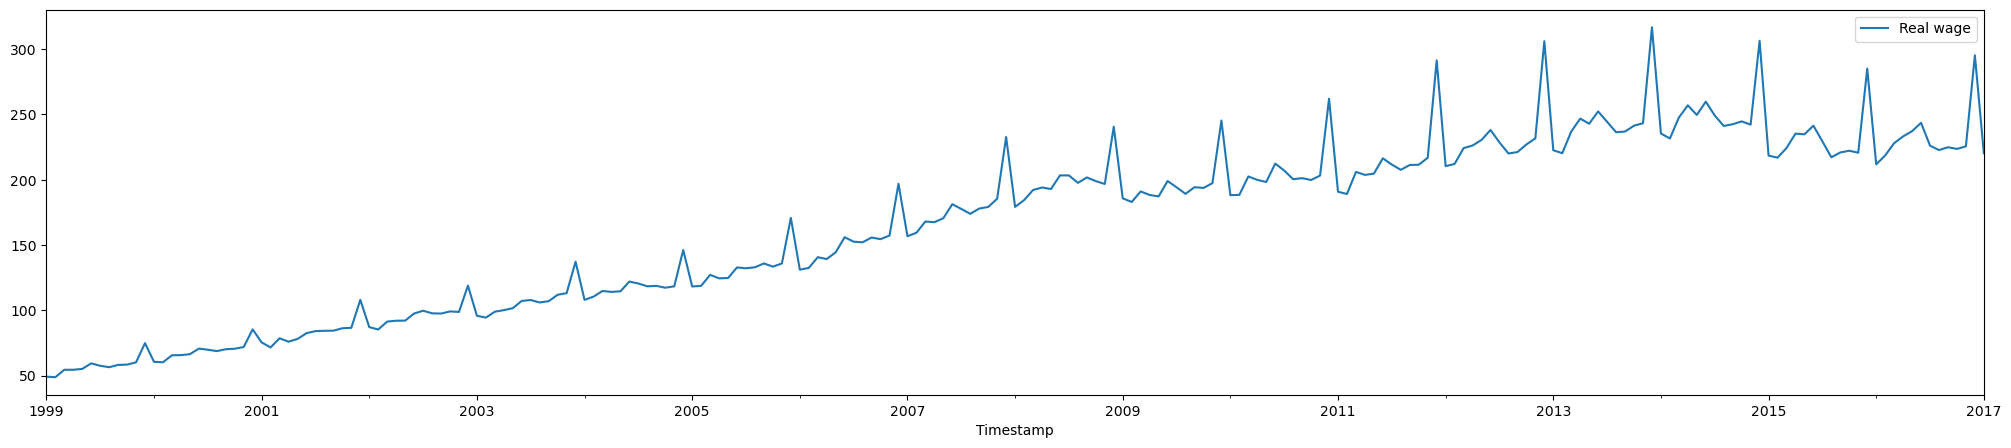

In [16]:
ts_wage.index.names=['Timestamp']
ts_wage = ts_wage.sort_index()

ts_wage = ts_wage.loc['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(25,5));

In [17]:
from statsmodels.tsa import stattools

def check_adf_stat(ts):
  df_stat = stattools.adfuller(ts)
  print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
        (df_stat[0], df_stat[1], df_stat[4]))

  if df_stat[0] > df_stat[4]['5%']:
      print('Есть единичные корни - ряд нестационарный')
  else:
      print('Единичных корней нет, ряд стационарен')

check_adf_stat(ts_wage)

The Augmented Dickey-Fuller test statistic -1.472201, 
pvalue: 0.55
critical values: {'1%': -3.462818103072159, '5%': -2.8758145932936805, '10%': -2.574378674548251}
Есть единичные корни - ряд нестационарный


Избавимся от тренда

In [18]:
ts_wage.shift(1)

,Real wage
Timestamp,
1999-01-01,NaN
1999-02-01,49.22
1999-03-01,48.77
1999-04-01,54.48
1999-05-01,54.48
...,...
2016-09-01,222.70
2016-10-01,224.90
2016-11-01,223.60


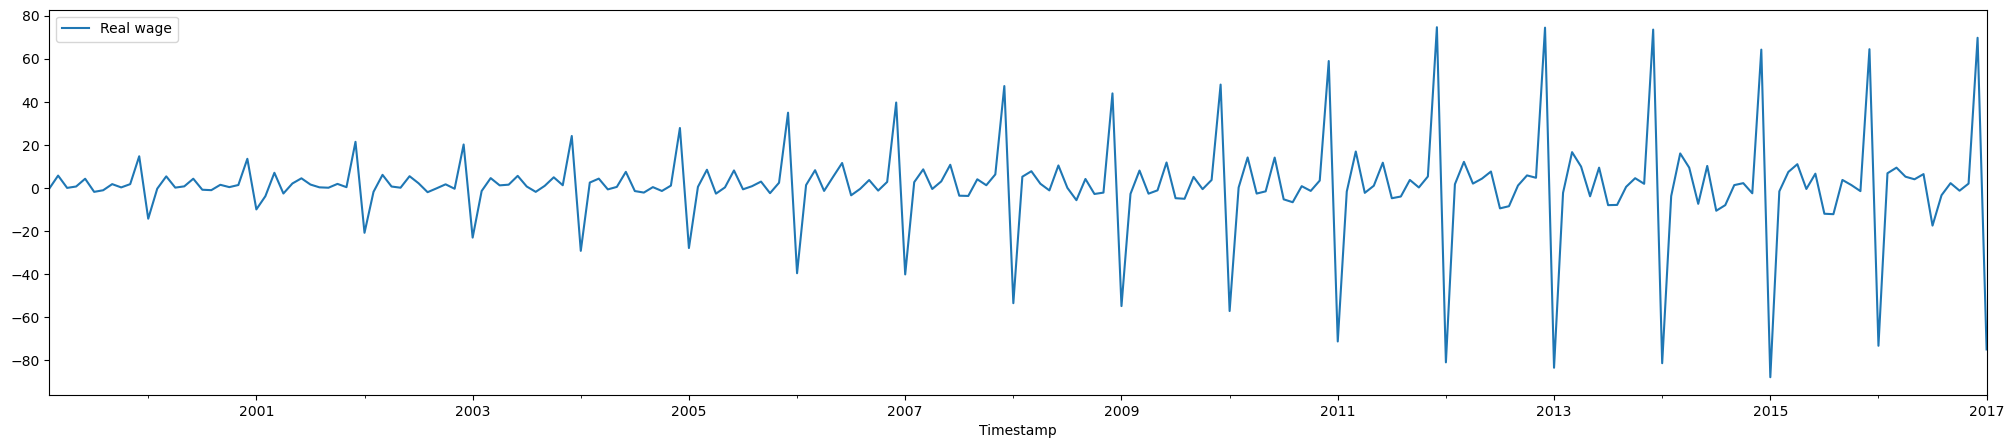

In [19]:
diff_ts_wage = (ts_wage - ts_wage.shift(1))[1:]
diff_ts_wage.plot(figsize=(25,5));

In [20]:
check_adf_stat(diff_ts_wage)

The Augmented Dickey-Fuller test statistic -2.558932, 
pvalue: 0.10
critical values: {'1%': -3.462818103072159, '5%': -2.8758145932936805, '10%': -2.574378674548251}
Есть единичные корни - ряд нестационарный


Избавимся от сезонности

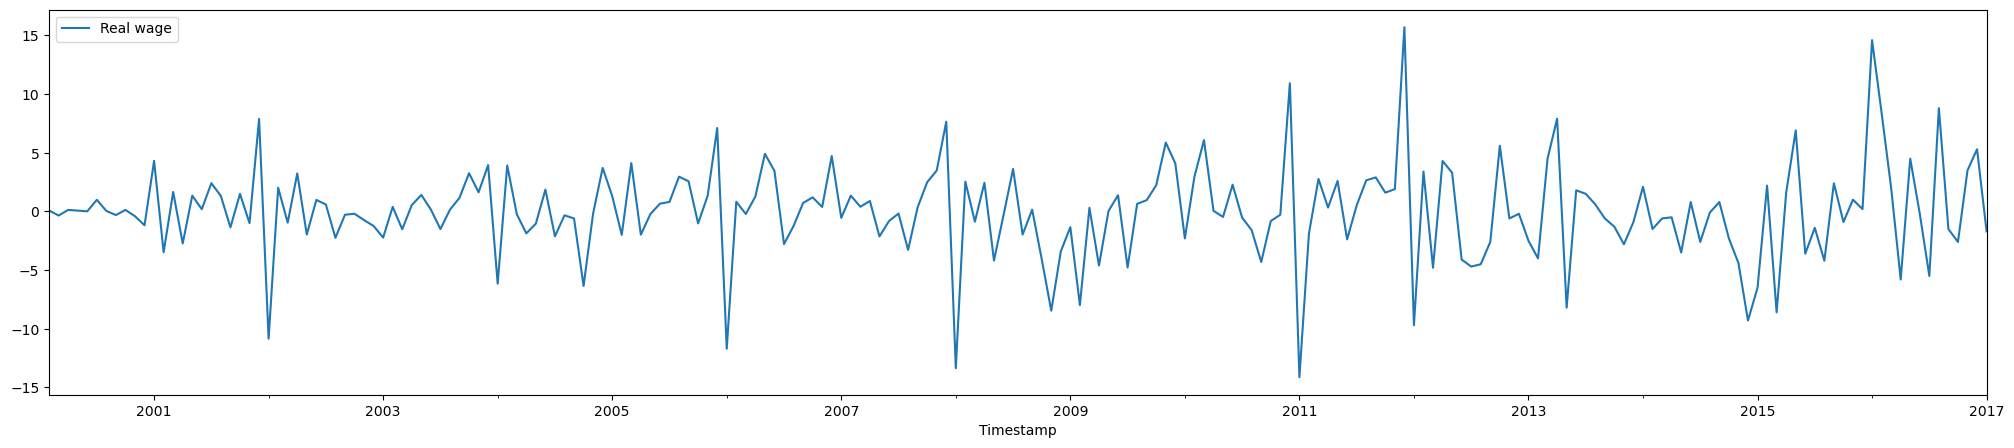

In [21]:
s = 12
sdiff_ts_wage = (diff_ts_wage - diff_ts_wage.shift(s))[s:]
sdiff_ts_wage.plot(figsize=(25,5));

In [22]:
check_adf_stat(sdiff_ts_wage)

The Augmented Dickey-Fuller test statistic -16.559783, 
pvalue: 0.00
critical values: {'1%': -3.462980134086401, '5%': -2.875885461947131, '10%': -2.5744164898444515}
Единичных корней нет, ряд стационарен


Преобразование Бокса-Кокса

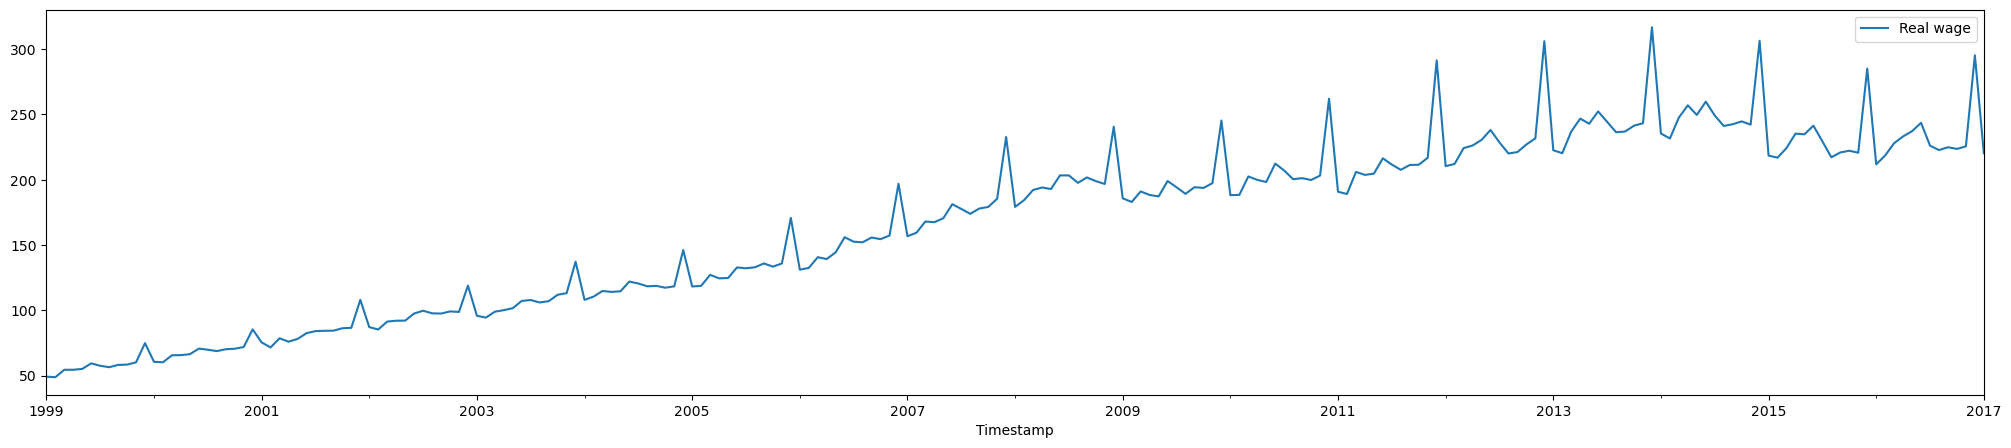

In [23]:
ts_wage.plot(figsize=(25,5));

In [24]:
from copy import deepcopy
from scipy import stats

ts_wage_boxcox = deepcopy(ts_wage)

print('optimal lambda:', stats.boxcox(ts_wage['Real wage'])[1])

optimal lambda: 0.9227089747975844


In [27]:
ts_wage_boxcox

,Real wage,wage_boxcox
Timestamp,,
1999-01-01,49.22,38.388269
1999-02-01,48.77,38.055165
1999-03-01,54.48,42.265008
1999-04-01,54.48,42.265008
1999-05-01,55.13,42.742008
...,...,...
2016-09-01,224.90,159.291369
2016-10-01,223.60,158.435805
2016-11-01,225.60,159.751900


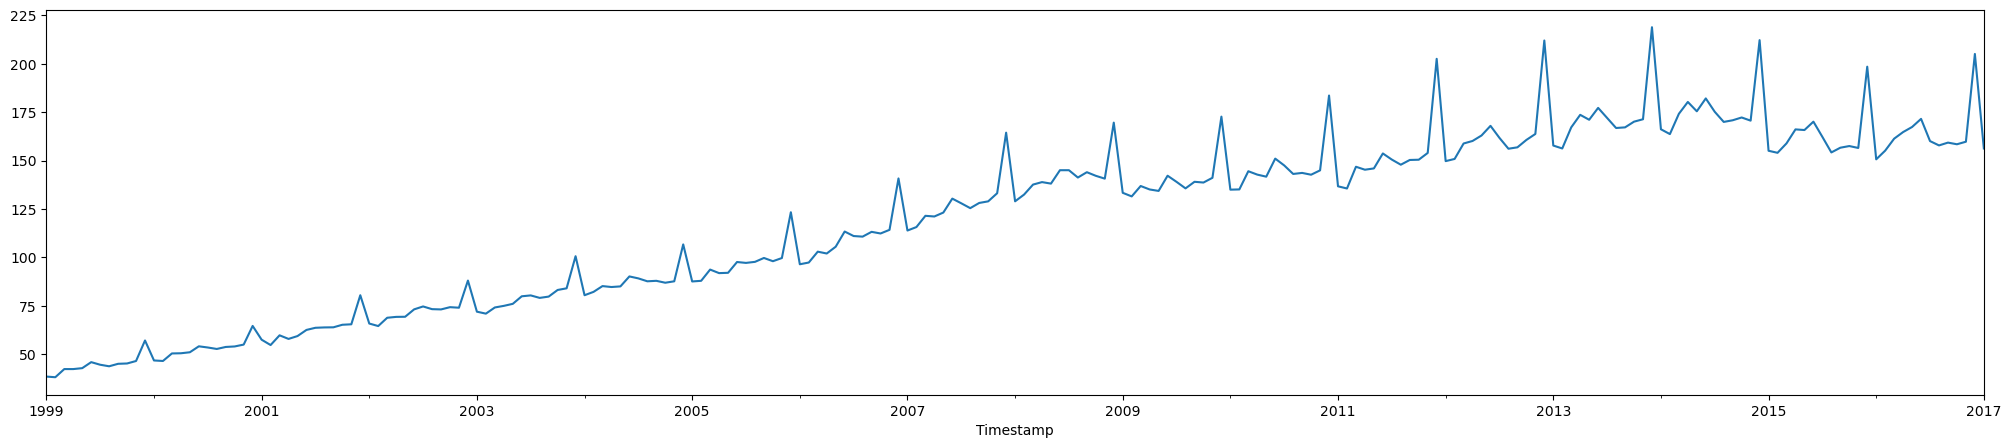

In [29]:
ts_wage_boxcox['wage_boxcox'] = stats.boxcox(ts_wage['Real wage'])[0]
ts_wage_boxcox['wage_boxcox'].plot(figsize=(25,5));

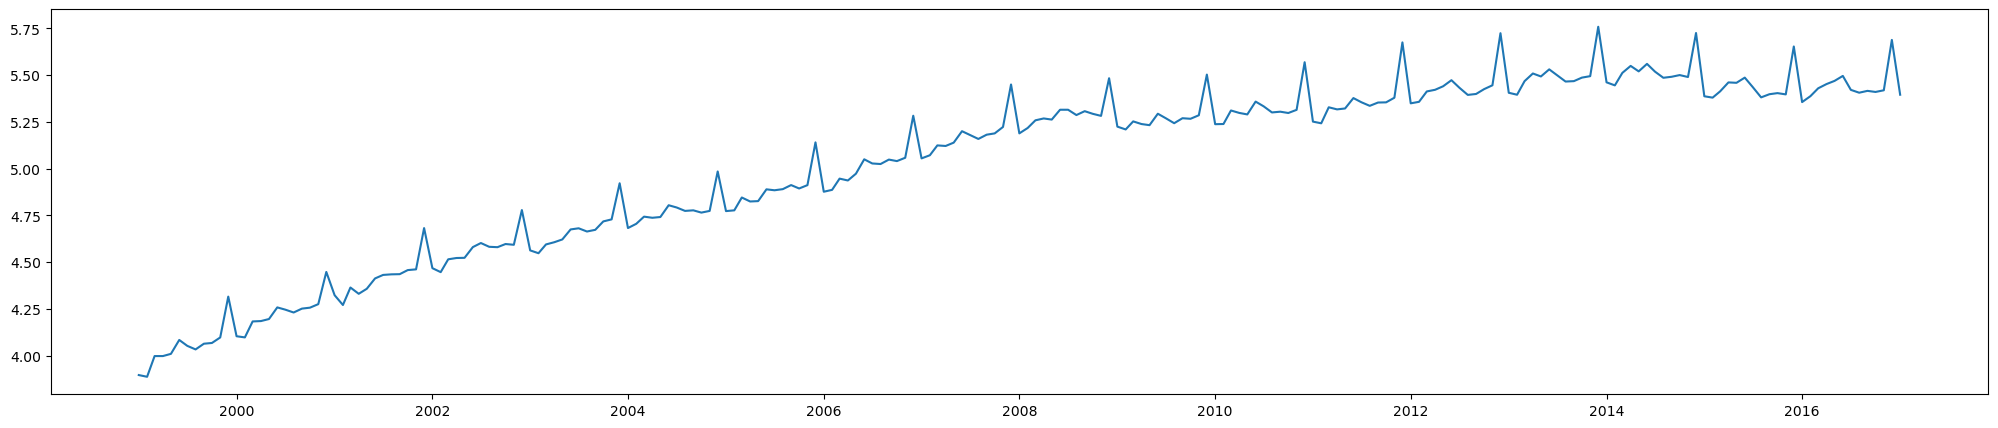

In [26]:
plt.figure(figsize=(25,5))
plt.plot(np.log(ts_wage));